# Исследование пользовательской активности приложения Procrastinate Pro+ с целью выявления узких мест в маркетинговой стратегии

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача исследования — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

Предстоит ответить на вопросы:

- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Создание-функций-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Создание-функций-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Создание функций для расчета и анализа LTV, ROI, удержания и конверсии</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Расходы-на-маркетинг" data-toc-modified-id="Расходы-на-маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расходы на маркетинг</a></span><ul class="toc-item"><li><span><a href="#Исследование-бюджета" data-toc-modified-id="Исследование-бюджета-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование бюджета</a></span></li><li><span><a href="#Расчет-CAC" data-toc-modified-id="Расчет-CAC-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Расчет CAC</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-экономических-метрик" data-toc-modified-id="Анализ-экономических-метрик-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ экономических метрик</a></span><ul class="toc-item"><li><span><a href="#Общая-окупаемость-рекламы" data-toc-modified-id="Общая-окупаемость-рекламы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Общая окупаемость рекламы</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-устройствам-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-странам-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по странам</a></span></li><li><span><a href="#Окупаемость-рекламы-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Окупаемость-рекламы-с-разбивкой-по-рекламным-каналам-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Окупаемость рекламы с разбивкой по рекламным каналам</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Причины-неэффективности" data-toc-modified-id="Причины-неэффективности-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Причины неэффективности</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></li></ul></div>

## Знакомство с данными

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

Нам предстоит работать с тремя датафреймами: 

- `visits_info_short` - лог сервера по посещениями приложения
- `orders_info_short` - информация о заказах
- `costs_info_short` - информация о расходах на привлечение клиентов

Перед тем как мы начнем первое знакомство с данными, напишем небольшую функцию, которая поможет не дублировать код три раза

In [2]:
def open_csv(path, info=False, describe=False, head=5):
    df = pd.read_csv(path)
    if info:
        print(df.info())
    if describe:
        print(df.describe().T)
    display(df.head(head))
    return df

Откроем и изучим данные о посещениях приложения

In [3]:
visits = open_csv('/datasets/visits_info_short.csv', info=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Структура понятна. Анализ подразумевает активную работу с датами, а также использование типовых значений столбцов в таблицах. Переименуем столбцы и поменяем тип данных в столбцах `Session Start` и `Session End`

In [4]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


Проверим данные на дубликаты

In [5]:
visits[visits.duplicated()]

,user_id,region,device,channel,session_start,session_end


Прямых дубликатов нет, а все значения в отдельных столбцах могут дублироваться, так как это лог посещений. Откроем и изучим файл с заказами

In [6]:
orders = open_csv('/datasets/orders_info_short.csv', info=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Тут необходимо провести ту же самую работу - поменять названия столбцов и изменить тип данных для столбца `Event Dt`

In [7]:
orders.columns = ['user_id', 'event_dt', 'revenue']
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Проверим на дубликаты

In [8]:
orders[orders.duplicated()]

,user_id,event_dt,revenue


Проведем те же операции для таблицы с информацией о расходах на привлечение клиентов

In [9]:
costs = open_csv('/datasets/costs_info_short.csv', info=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [10]:
costs.columns = ['dt', 'channel', 'costs']
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.info()
costs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Также проверим на дубликаты

In [11]:
costs[costs.duplicated()]

,dt,channel,costs


### Выводы

- К исследованию предложено три таблицы - `visits_info`, `orders_info`, `costs_info` о посещениях приложения, заказах и расходах на маркетинг соответственно
- Тип данных во всех столбцах с датами изменили на `datetime.datetime`, кроме столбца `dt` таблицы `costs_info`, его поменяли на `datetime.date`
- Переименовали столбцы, приведя его к единому формату "`col_name`"
- Дубликаты не выявлены

## Создание функций для расчета и анализа LTV, ROI, удержания и конверсии

In [12]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs, max_date=None, min_date=None):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    # округляем стоимость привлечения до 2 знаков после запятой
    profiles['acquisition_cost'] = round(profiles['acquisition_cost'], 2)
    
    # если даны ограничения по времени, выполним срез данных
    if max_date and min_date:
        profiles = profiles.query('@max_date >= first_ts >= @min_date')
    return profiles


In [13]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [14]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [15]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [16]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [17]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [18]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [19]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

Воспользуем функцией построения профилей пользователей `get_profiles`

In [20]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


Определим минимальную и максимальную даты привлечения пользователей

In [21]:
max_date = profiles.first_ts.max()
min_date = profiles.first_ts.min()

print(f'Максимальная дата в отчете: {max_date}')
print(f'Минимальная дата в отчете: {min_date}')

Максимальная дата в отчете: 2019-10-27 23:59:04
Минимальная дата в отчете: 2019-05-01 00:00:41


Данные в отчете предоставлены за период с 1-ого мая 2019-ого года по 27 октября 2019-ого года.Теперь исследуем таблицу по регионам, устройствам и каналам привлечения на предмет общего количества пользователей и доли платящих пользователей. Для упрощения напишем небольшую функцию

In [22]:
# аналитическая функция для исследования профилей
def show_profile_analysis(profiles, category):
    
    # создаем таблицу общего количества пользователей по заданной категории 
    users_by_category = profiles[category].value_counts().reset_index()
    users_by_category.columns = [category, 'users_count']
    
    # создаем столбец доли пользователей категории от общего количества пользователей
    users_by_category['prop_users %'] = round(
        users_by_category['users_count'] / users_by_category['users_count'].sum() * 100, 2)
    
    # создаем таблицу платящих пользователей по заданной категории
    payers_by_category = profiles.query('payer == True')[category].value_counts().reset_index()
    payers_by_category.columns = [category, 'payers_count']
    
    # создаем столбец доли платящих пользователей от общего количества пользователей
    payers_by_category['prop_payers %'] = round(
        payers_by_category['payers_count'] / payers_by_category['payers_count'].sum() * 100, 2)
    
    # добавляем расчет конверсии пользователя в покупателя
    payers_by_category = payers_by_category.merge(users_by_category[[category, 'users_count']], on=category)
    payers_by_category['conversion %'] = round(
        payers_by_category['payers_count'] / payers_by_category['users_count'] * 100, 2)
    
    # выводим отчет на экранЭ
    print(f'Пользователи по категории {category}')
    display(users_by_category)
    print('-----------------------------------------')
    print(f'Платящие пользователи по категории {category}')
    display(payers_by_category)

Посмотрим на отчет по региону

In [23]:
show_profile_analysis(profiles, 'region')

Пользователи по категории region


,region,users_count,prop_users %
0,United States,100002,66.66
1,UK,17575,11.72
2,France,17450,11.63
3,Germany,14981,9.99


-----------------------------------------
Платящие пользователи по категории region


,region,payers_count,prop_payers %,users_count,conversion %
0,United States,6902,77.72,100002,6.90
1,UK,700,7.88,17575,3.98
2,France,663,7.47,17450,3.80
3,Germany,616,6.94,14981,4.11


Больше половины всех пользователей из США, при этом доля платящих пользователей еще больше - 77%. Пользователи из США показывают общую конверсию почти в два раза выше пользователей из остальных стран. Расширение на рынки других стран - возможная точка роста.

Посмотрим отчет по девайсам

In [24]:
show_profile_analysis(profiles, 'device')

Пользователи по категории device


,device,users_count,prop_users %
0,iPhone,54479,36.32
1,Android,35032,23.35
2,PC,30455,20.30
3,Mac,30042,20.03


-----------------------------------------
Платящие пользователи по категории device


,device,payers_count,prop_payers %,users_count,conversion %
0,iPhone,3382,38.08,54479,6.21
1,Android,2050,23.08,35032,5.85
2,Mac,1912,21.53,30042,6.36
3,PC,1537,17.31,30455,5.05


Соотношение практически равное с преимуществом пользователей использующих iPhone - 36% против средних 20% у остальных девайсов. При этом платящих пользователей несколько больше на iPhone по сравнению с остальными дейвайсам - почти 40%. Конверсия также различается не так значительно, у пользователей девайсов компании Apple она выше - чуть больше 6%, меньше всего у пользователей PC - 5%.

Возможно версии приложения на Android и PC сильно отличаются от приложенй на IOS и Mac. Увеличение конверсии на PC в первую очередь может быть точкой роста. 

Посмотрим на отчет по каналам продвижения

In [25]:
show_profile_analysis(profiles, 'channel')

Пользователи по категории channel


,channel,users_count,prop_users %
0,organic,56439,37.62
1,FaceBoom,29144,19.43
2,TipTop,19561,13.04
3,OppleCreativeMedia,8605,5.74
4,WahooNetBanner,8553,5.70
5,LeapBob,8553,5.70
6,RocketSuperAds,4448,2.97
7,MediaTornado,4364,2.91
8,YRabbit,4312,2.87
9,AdNonSense,3880,2.59


-----------------------------------------
Платящие пользователи по категории channel


,channel,payers_count,prop_payers %,users_count,conversion %
0,FaceBoom,3557,40.05,29144,12.20
1,TipTop,1878,21.15,19561,9.60
2,organic,1160,13.06,56439,2.06
3,WahooNetBanner,453,5.10,8553,5.30
4,AdNonSense,440,4.95,3880,11.34
5,RocketSuperAds,352,3.96,4448,7.91
6,LeapBob,262,2.95,8553,3.06
7,OppleCreativeMedia,233,2.62,8605,2.71
8,lambdaMediaAds,225,2.53,2149,10.47
9,YRabbit,165,1.86,4312,3.83


Больше всего пользователей приходит органическим путем, что хорошо, так как это бесплатно, однако средняя конверсия по таким пользователям чрезвычайно низкая - всего 2% против 12% у канала FaceBoom. Это требует дополнительного анализа. 

13% от всех пользователей приходит через канал Tip Top, при этом конверсия по этому каналу не такая большая 9.6%.

Также наблюдается чрезвычайно низкий уровень платящих пользователей, приходящих со всех каналов, кроме FaceBoom, TipTop и органического канала это необходимо исследовать подробнее.

### Выводы

- Больше половины всех пользователей из США, при этом доля платящих пользователей еще больше - 77%
- Пользователи из США показывают общую конверсию почти в два раза выше пользователей из остальных стран
- Расширение на рынки других стран - возможная точка роста
- Соотношение по девайсам практически равное с преимуществом пользователей использующих iPhone - 36% против средних 20% у остальных девайсов
- Платящих пользователей несколько больше на iPhone по сравнению с остальными дейвайсам - 38%
- Общая конверсия у пользователей девайсов компании Apple выше - больше 6%, меньше всего у пользователей PC - 5%
- Возможно версии приложения на Android и PC сильно отличаются от приложенй на IOS и Mac. Увеличение конверсии на PC в первую очередь может быть точкой роста
- Больше всего пользователей приходит органическим путем - почти 38%
- Средняя конверсия по органическим пользователям чрезвычайно низкая 2% против 12.2% у канала FaceBoom
- 13% от всех пользователей приходит через канал Tip Top, при этом конверсия по этому каналу также невелика - 9.6%
- Наблюдается чрезвычайно низкий уровень платящих пользователей, приходящих со всех каналов, кроме FaceBoom, TipTop и органического канала, это необходимо исследовать подробнее

## Расходы на маркетинг

### Исследование бюджета

Посмотрим сколько денег потратили на привлечение клиентов и как этот бюджет распределен на каждый источник и каждый месяц рассматриваемого диапозона.

In [26]:
total_marketing_budget = profiles.acquisition_cost.sum()
print(f'Всего потрачено на маркетинг {total_marketing_budget}$')

Всего потрачено на маркетинг 105500.76$


Почти 20 тысяч долларов за месяц. С учетом того, что компания терпит убытки, сумма значительная.

In [27]:
budget_channels_ratio = profiles.query('channel != "organic"').groupby('channel').agg({'acquisition_cost': 'sum'})
budget_channels_ratio.columns = ['total_budget']
budget_channels_ratio['ratio'] = round(
    budget_channels_ratio['total_budget'] / budget_channels_ratio['total_budget'].sum() * 100, 2)
budget_channels_ratio.sort_values(by='total_budget', ascending=False)

,total_budget,ratio
channel,,
TipTop,54751.59,51.90
FaceBoom,32452.29,30.76
WahooNetBanner,5149.78,4.88
AdNonSense,3909.18,3.71
OppleCreativeMedia,2154.71,2.04
RocketSuperAds,1830.77,1.74
LeapBob,1797.89,1.70
lambdaMediaAds,1557.40,1.48
MediaTornado,954.33,0.90


Более 50% всего бюджето ушло на Tip Top при том, что канал приносит мало платящих клиентов. При этом на FaceBoom, приносящий больше половины платящих клиентов компания тратит всего 30% бюджета. Остальных каналов много, но на них тратится >1-4% бюджета. При оценке экономических метрик необходимо уделить этим каналом особое внимание.

Посмотрим на распределение расходов во времени.

Text(0.5, 1.0, 'Распределение затрат по времени и каналам')

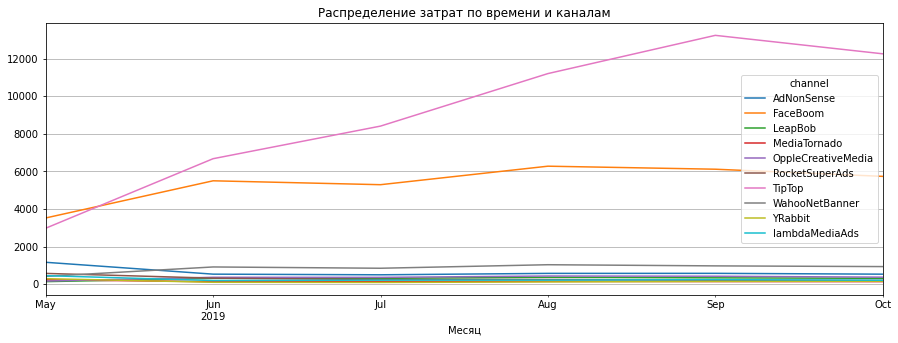

In [28]:
budget_channels_in_time = pd.pivot_table(
    profiles.query('channel != "organic"'), 
    values='acquisition_cost',
    index='channel',
    columns='month',
    aggfunc='sum'
)
budget_channels_in_time.T.plot(figsize=(15, 5), grid=True)
plt.xlabel('Месяц')
plt.title('Распределение затрат по времени и каналам')

На FaceBoom тратили примерно одинаково денег на всем протяжении исследуемого периода с небольшим трендом на рост с мая по август и на снижение с августа по октябрь.

Затраты на TipTop выросли в 4 раза с мая по сентябрь и незначительно снизились к октябрю.

### Расчет CAC

Рассчитаем CAC на одного пользователя для всего проекта.

In [29]:
project_cac = round(
    profiles.query('channel != "organic"')['acquisition_cost'].sum() / 
    profiles.query('channel != "organic"')['user_id'].count(), 2)
print(f'CAC по всему проекту: {project_cac}$')

CAC по всему проекту: 1.13$


Теперь посмотрим на средний показатель CAC для каждого источника

In [30]:
cac_channels = profiles.query('channel != "organic"').groupby('channel').agg({
    'acquisition_cost': 'sum', 'user_id': 'count'})
cac_channels.columns = ['total_budget', 'user_count']
cac_channels['CAC'] = round(cac_channels['total_budget'] / cac_channels['user_count'], 2)
cac_channels[['total_budget', 'CAC']].sort_values(by='total_budget', ascending=False)

,total_budget,CAC
channel,,
TipTop,54751.59,2.80
FaceBoom,32452.29,1.11
WahooNetBanner,5149.78,0.60
AdNonSense,3909.18,1.01
OppleCreativeMedia,2154.71,0.25
RocketSuperAds,1830.77,0.41
LeapBob,1797.89,0.21
lambdaMediaAds,1557.40,0.72
MediaTornado,954.33,0.22


TipTop оказался не просто ключевым каналом в маркетинговой стратегии, но еще и самым дорогим. Цена за привлечение одного пользователя превышает второй по значимости канал FaceBoom почти в три раза. При анализе экономических метрик на него нужно обратить особое внимание. 

CAC по остальным каналам в целом ниже среднего значения иногда более чем в два раза.

### Выводы

- Всего за 6 месяцев потрачено 105 тысяч долларов, это почти 20 тысяч долларов в месяц
- Более 50% всего бюджето ушло на канал Tip Top, при том, что он принес чуть больше 20% платящих клиентов
- Канал Face Boom напротив принес больше 40% платящих клинетов, при том, что на него потрачено 30% всего бюджета
- В остальные каналы инвестировали не более 5% бюджета
- На FaceBoom тратили примерно одинаковое денег на всем протяжении исследуемого периода с небольшим трендом на рост с мая по август и на снижение с августа по октябрь.
- Затраты на TipTop выросли в 4 раза с мая по сентябрь и незначительно снизились к октябрю.
- Средний CAC по всему проекту составляет 1.13 долларов
- Дороже всего обходятся клиенты с Tip Top - почти 3 доллара за пользователя
- Пользователи с канала FaceBoom находятся на уровне среднего показателя 
- Остальные каналы привлечения в целом ниже среднего

## Анализ экономических метрик

### Общая окупаемость рекламы

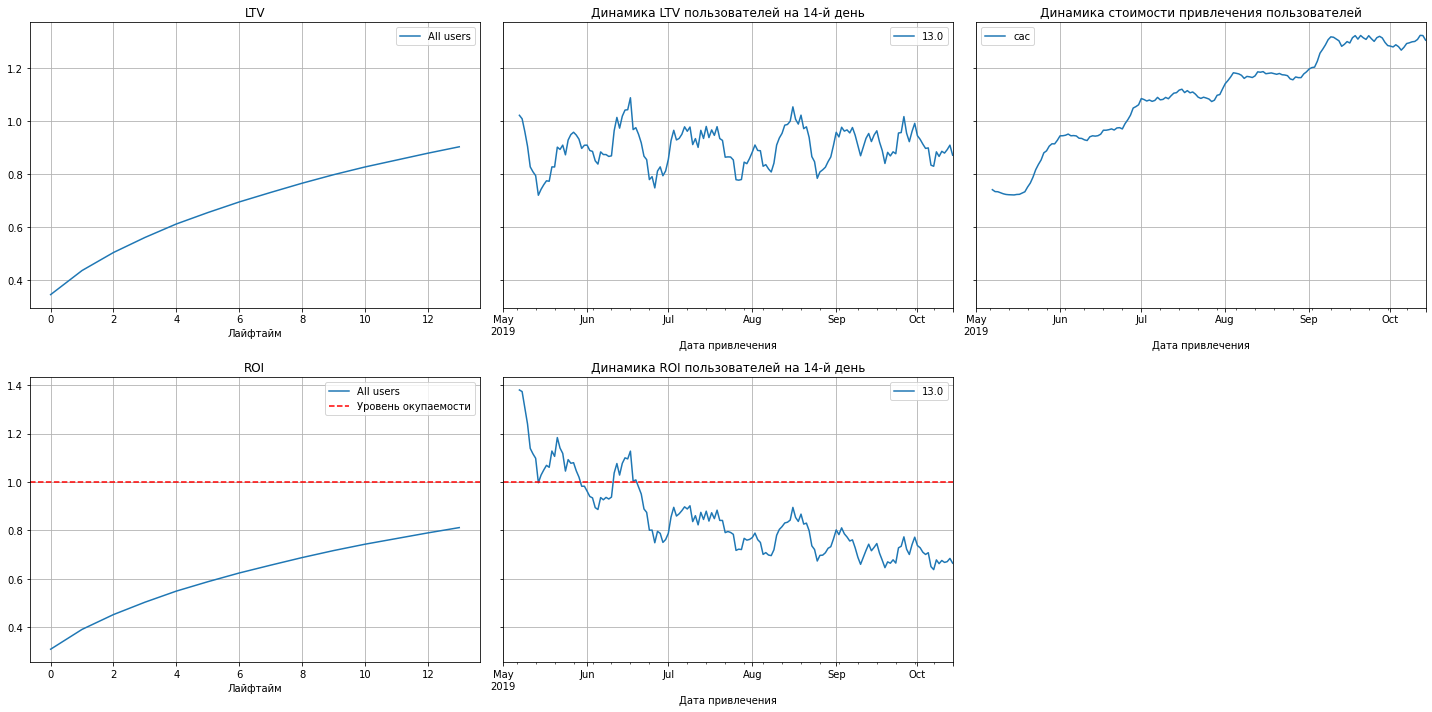

In [31]:
observation_date = max_date
horizon = 14
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7)

LTV в целом стабилен, наблюдается боковой тренд на протяжении всего исследуемого периода. Стоимость привлечения пользователей стабильно растет, а ROI падает. Маркетинговая компания стала убыточной в середине июня и далее до октября приносила только убыток. Возможно это связано с ростом инвестиций в канал TipTop, который по всему предыдущему анализу показывал плохие результаты.

### Окупаемость рекламы с разбивкой по устройствам

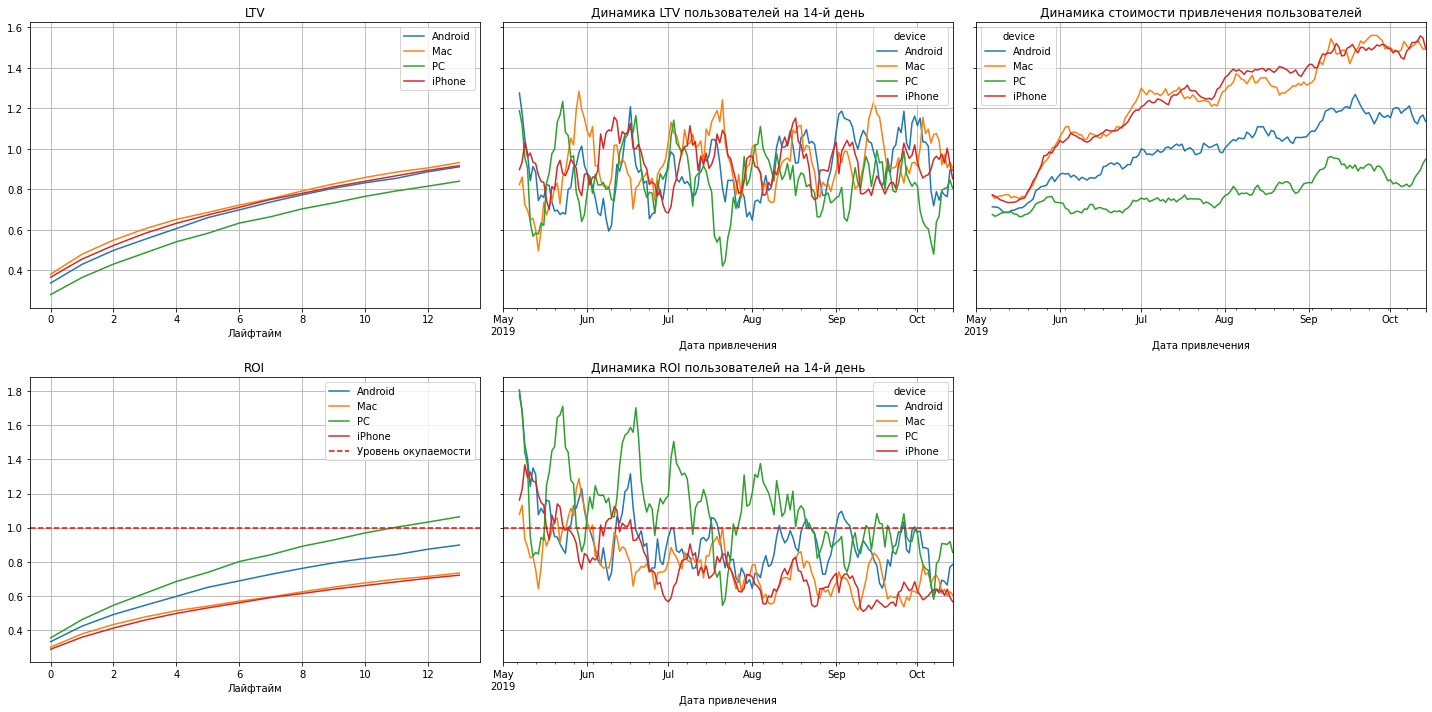

In [32]:
observation_date = max_date
horizon = 14
dimensions = ['device']
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon, dimensions=dimensions)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7)

При том, что стоимость привлечения пользователей с девайсами от компании Apple значительно выше остальных, они почти не показали прибыли за весь период компании. Пользователи PC напротив, стоили дешевле всего и показывали наибольший ROI на протяжении почти всей компании. Пользователи Android также оказались более экономически эффективными, чем пользователи с девайсами от компании Apple.

Посмотрим на конверсию

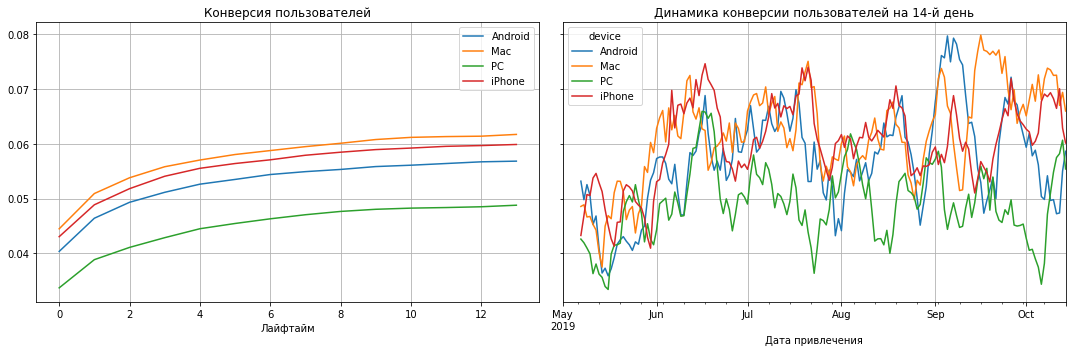

In [33]:
observation_date = max_date
horizon = 14
dimensions = ['device']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon, dimensions=dimensions)
plot_conversion(conversion, conversion_history, horizon, window=7)

Ожидаемо, чем больше денег тратиться на привлечение пользователей определенной категории, тем выше по ним конверсия. Динамика по конверсии схожа с динамикой по затратам.

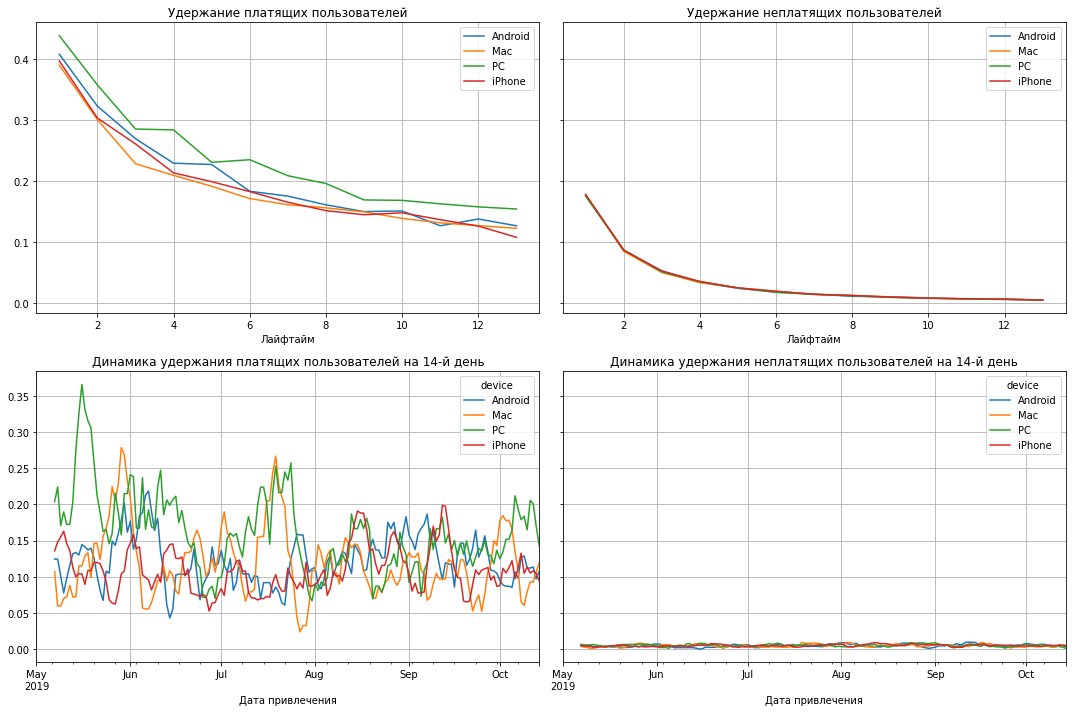

In [34]:
observation_date = max_date
horizon = 14
dimensions = ['device']

retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon, dimensions=dimensions)
plot_retention(retention, retention_history, horizon, window=7)

Удержание платящих пользователей стабильно выше всего среди PC, на втором месте идет Android. Динамика удержания неплатящих пользователей идентична по всем девайсам.

### Окупаемость рекламы с разбивкой по странам

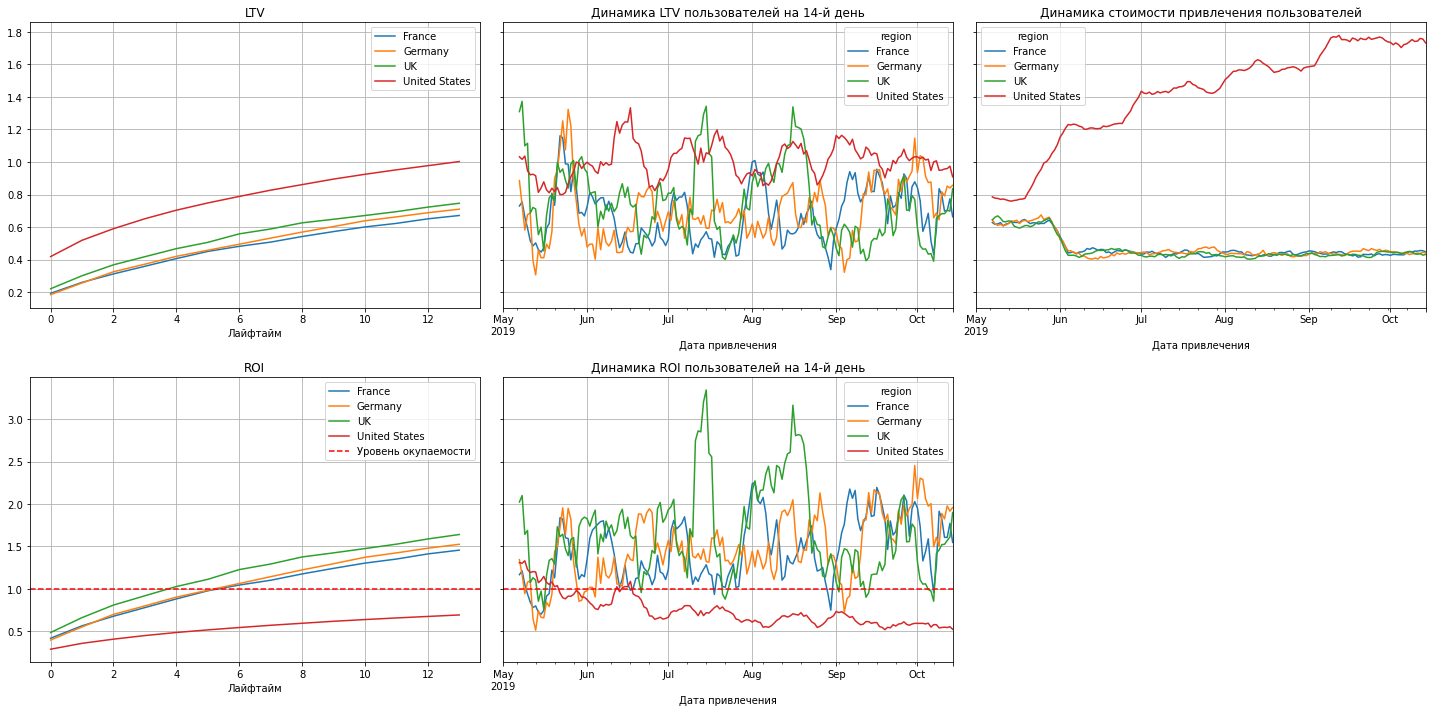

In [35]:
observation_date = max_date
horizon = 14
dimensions = ['region']
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon, dimensions=dimensions)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7)

Заметен активный фокус на привлечении пользователей из США. Это также видно по анализу профилей, большая часть пользователей из США. При этом анализ ROI показывает, что пользователи из США приносят наименьшую прибыль, видимо из-за высоких костов на привлечение, ведь LTV выше значительно выше остальных регионов. Больше того, это единственный тип пользователей, который находится в минусе к концу рассматриваемого периода.

Посмотирм графики по конверсии

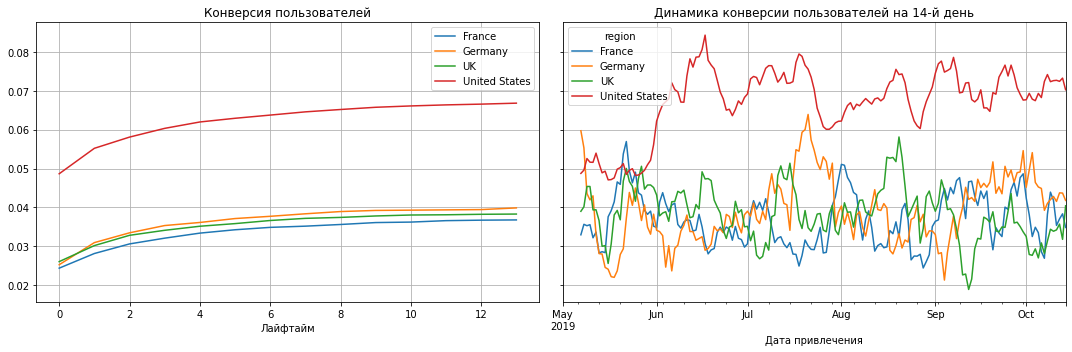

In [36]:
observation_date = max_date
horizon = 14
dimensions = ['region']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon, dimensions=dimensions)
plot_conversion(conversion, conversion_history, horizon, window=7)

Высокая конверсия пользователей из США не помогает зарабатывать. Возможно дело в низком удержании пользователей или чрезвычайно высокой стоимости привлечения.

Посмотрим на графики удержания.

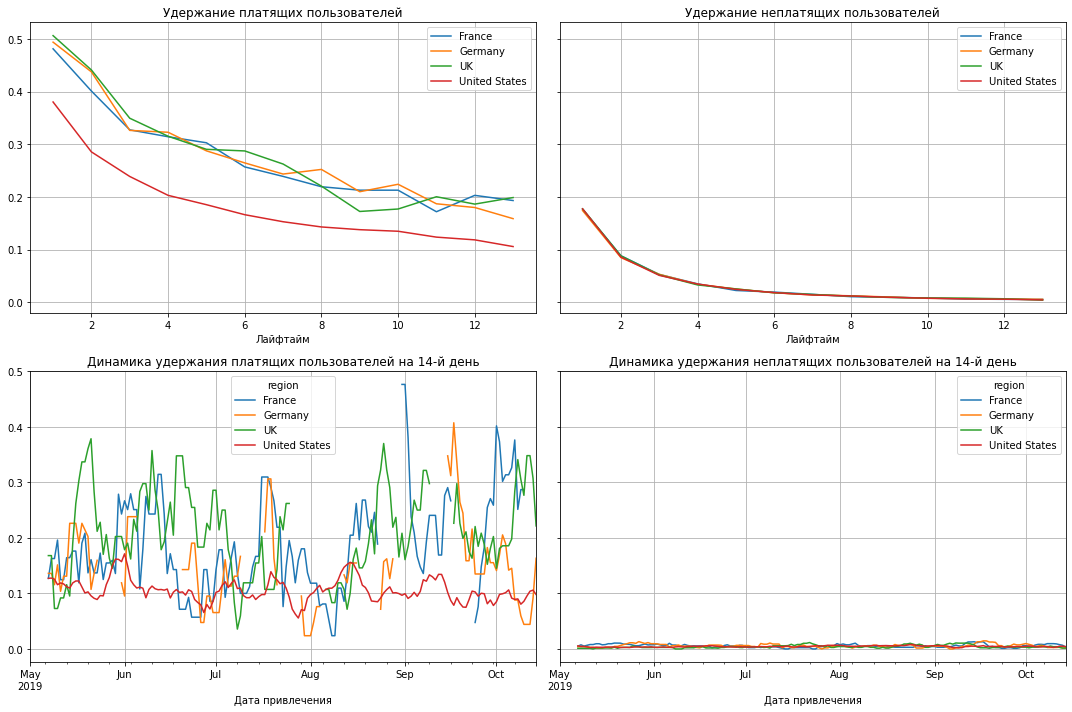

In [37]:
observation_date = max_date
horizon = 14
dimensions = ['region']

retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon, dimensions=dimensions)
plot_retention(retention, retention_history, horizon, window=7)

Действительно удержание платящий пользователей ниже всего. При этом удержание платящих пользователей из Германии, Великобритании и Франции находится на хорошем уровне. Неизвестно будет ли сохраняться этот уровень при масштабировании, но это точно одна из гипотез, которую нужно проверить.

Посмотрим на канале в разрезе пользователей из США

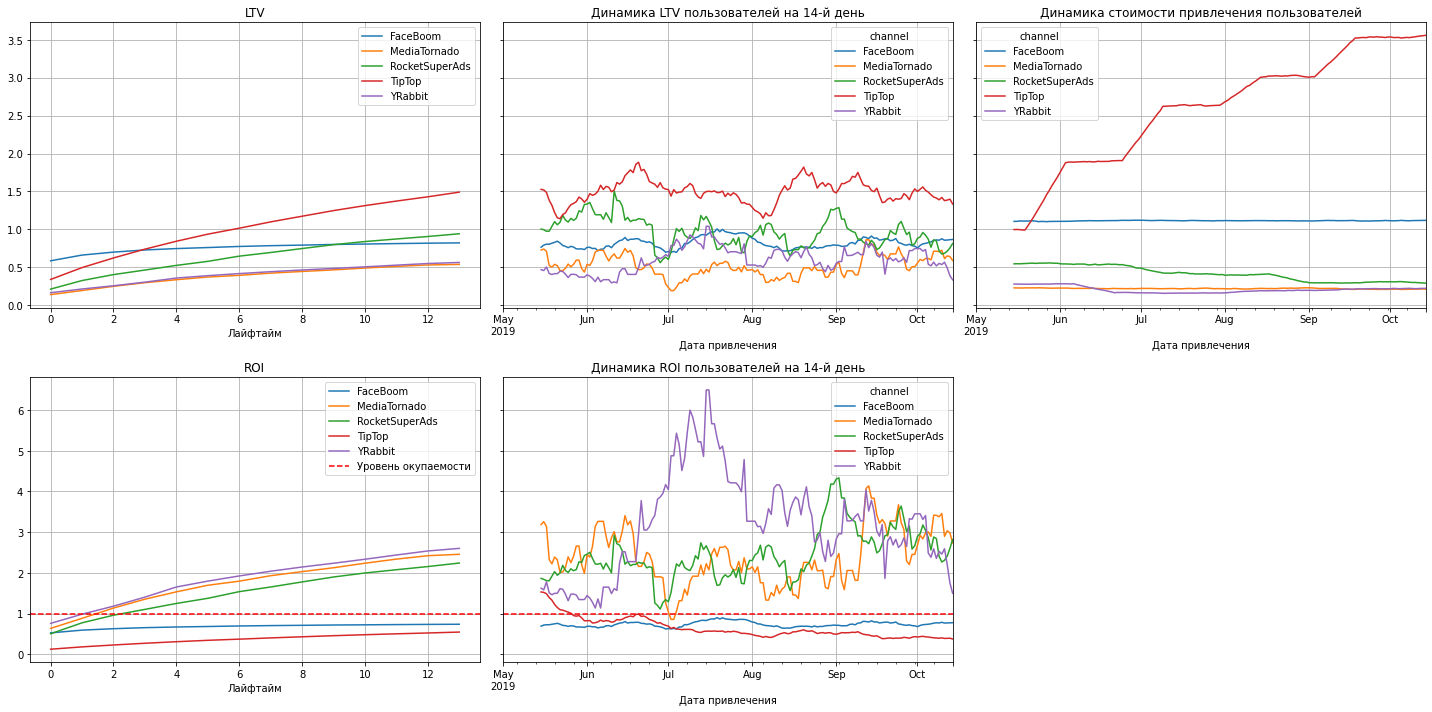

In [38]:
observation_date = max_date
horizon = 14
dimensions = ['channel']
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic" and region == "United States"'), orders, observation_date, horizon, dimensions=dimensions)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=15)

Из пяти каналов, которые были использованы для пользователей из США FaceBoom и TipTop - лидеры по доле маркетинговой компании явно провалились по ROI, зато все остальные показали прибыль.

### Окупаемость рекламы с разбивкой по рекламным каналам

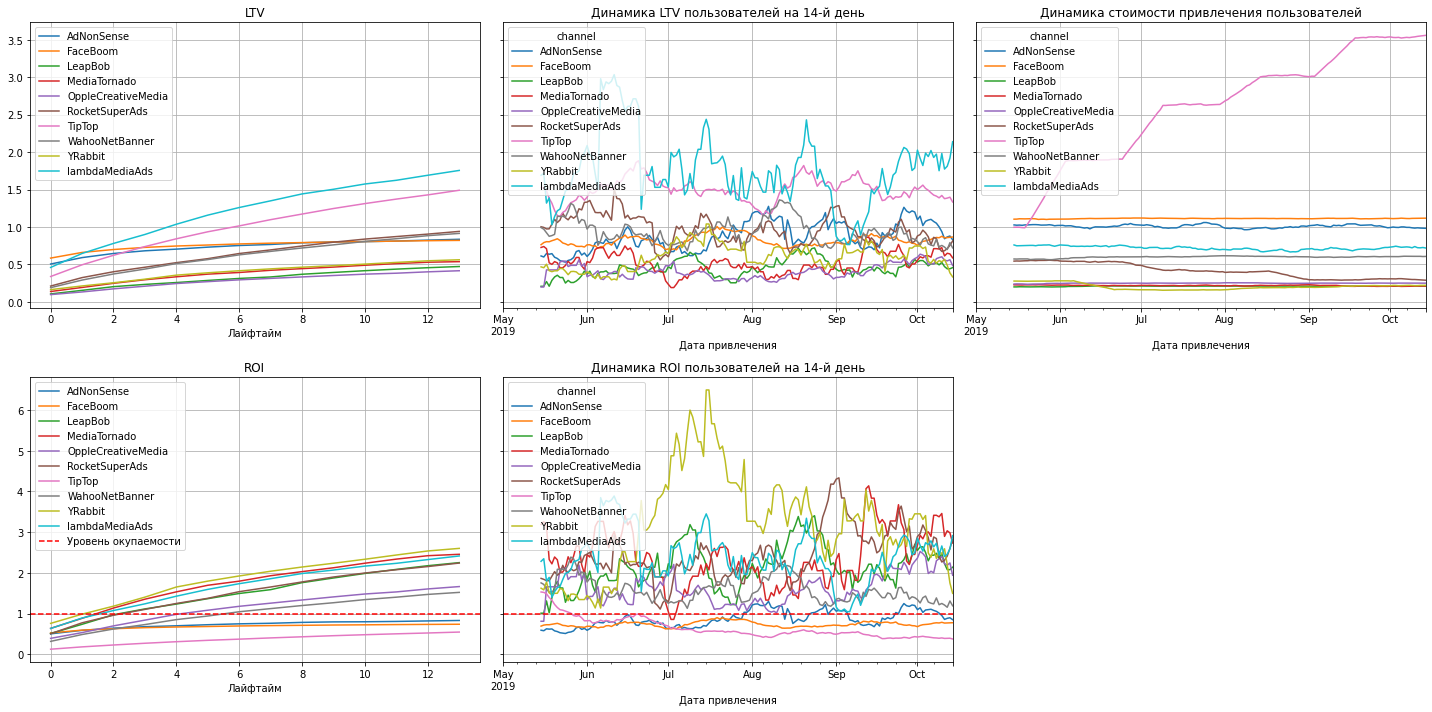

In [39]:
observation_date = max_date
horizon = 14
dimensions = ['channel']
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon, dimensions=dimensions)

plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=15)

Стоимость привлечения пользователей по каналу TipTop не весь период компании была самой высокой. Мы видим скачкообразное повышение цены каждый месяц, при том, что изначально она хоть и была высокой, но на уровне всех остальных каналов. При этом остальные каналы не имеют такой же тенденции. 

Почти все каналы вышли в прибыль на протяжении лайфтайма в две недели, луче всего себя показал канал YRabbit, это же видно по динамке ROI. Три канала оказались убыточны, среди которых AdNonSense, FaceBoom и TipTop, последние два при этом являются основными каналми всей компании.

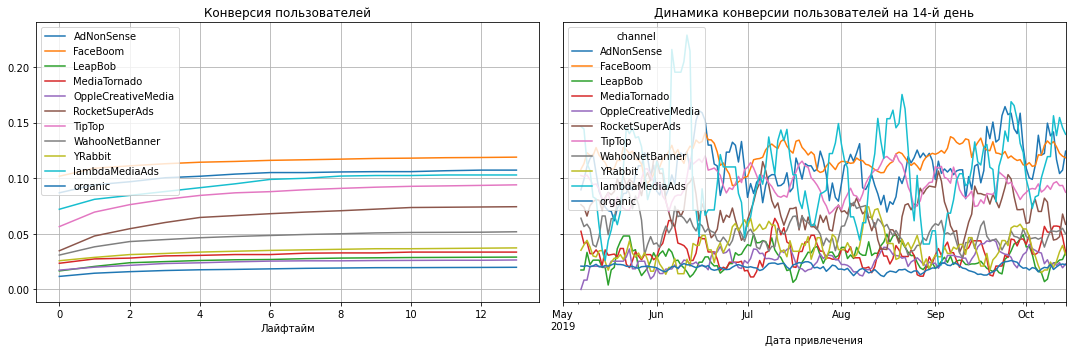

In [40]:
observation_date = max_date
horizon = 14
dimensions = ['channel']

conversion_raw, conversion, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon, dimensions=dimensions)
plot_conversion(conversion, conversion_history, horizon, window=7)

По конверсии TipTop также не имеет лучшего показателя, хоть он и достаточно высок - четвертое место по лайфтайму. Лучше всего по конверсии себя показал канал FaceBoom и AdNonSense, однако, они в итоге не окупились. Стоит обратить внимание на LambdaMediaAds, канал имеет хорошую окупаемость и высокую конверсию и также хорошо себя показывает в динамике.

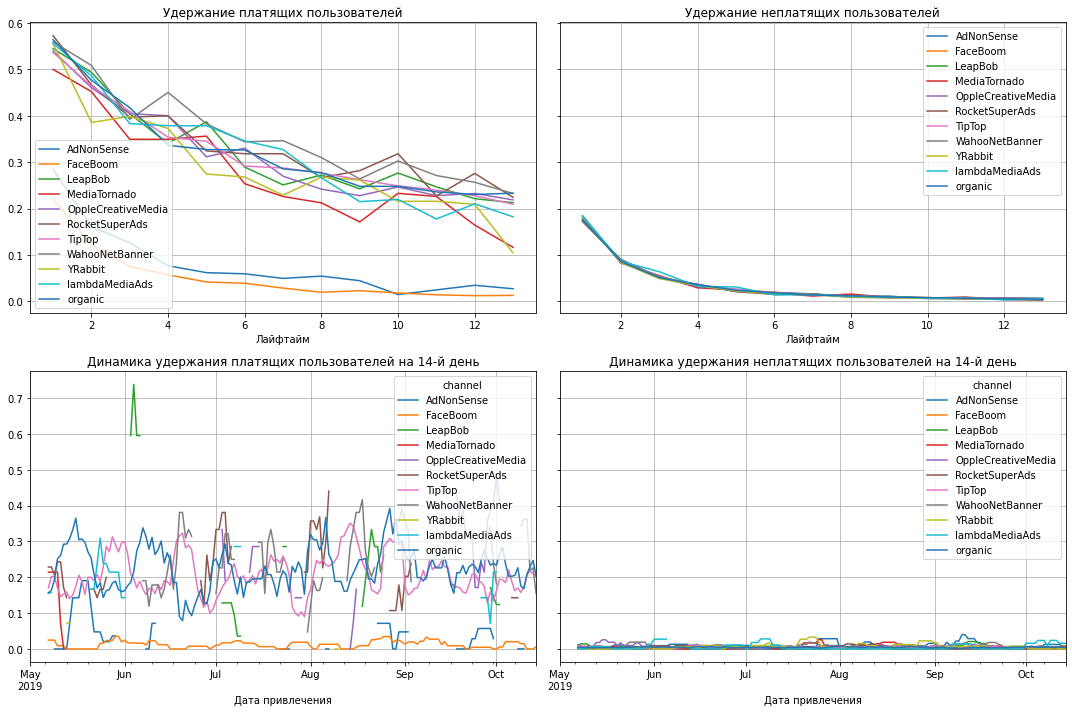

In [41]:
observation_date = max_date
horizon = 14
dimensions = ['channel']

retention_raw, retention, retention_history = get_retention(
    profiles, visits, observation_date, horizon, dimensions=dimensions)
plot_retention(retention, retention_history, horizon, window=7)

Удержание AdNonSense и FaceBoom чрезвычайно низкое, это скорее всего и является причиной низкой окупаемости. Остальные каналы находятся примерно на одном уровне.

### Вывод

- LTV в целом стабилен, наблюдается боковой тренд на протяжении всего исследуемого периода. 
- Стоимость привлечения пользователей стабильно растет, а ROI падает. 
- Маркетинговая компания стала убыточной в середине июня и далее до октября приносила только убыток.
- При том, что стоимость привлечения пользователей с девайсами от компании Apple значительно выше остальных, они почти не показали прибыли 
- Пользователи PC стоили дешевле всего и показывали наибольший ROI 
- Пользователи Android также оказались более экономически эффективными, чем пользователи с девайсами от компании Apple.
- Удержание платящих пользователей стабильно выше всего среди PC, на втором месте идет Android. 
- Анализ ROI показывает, что пользователи из США приносят наименьшую прибыль, видимо из-за высоких костов на привлечение, ведь LTV выше значительно выше остальных регионов. Это единственный тип пользователей, который находится в минусе к концу рассматриваемого периода.
- Пользователи из США показывают высокую конверсию, а удержание платящий пользователей ниже всего. 
- Удержание платящих пользователей из Германии, Великобритании и Франции находится на хорошем уровне. 
- Стоимость привлечения пользователей по каналу TipTop не весь период компании была самой высокой. Мы видим скачкообразное повышение цены каждый месяц, при том, что изначально она хоть и была высокой, но на уровне всех остальных каналов. При этом остальные каналы не имеют такой же тенденции.
- Почти все каналы вышли в прибыль на протяжении лайфтайма в две недели
- Лучше всего себя показал канал YRabbit, это же видно по динамке ROI. 
- Три канала оказались убыточны, среди которых AdNonSense, FaceBoom и TipTop, последние два при этом являются основными каналми всей компании.
- По конверсии TipTop также не имеет лучшего показателя, хоть он и достаточно высок - четвертое место по лайфтайму. 
- Лучше всего по конверсии себя показал канал FaceBoom и AdNonSense, однако, они в итоге не окупились.
- Стоит обратить внимание на LambdaMediaAds, канал имеет хорошую окупаемость и высокую конверсию и также хорошо себя показывает в динамике.
- Удержание AdNonSense и FaceBoom чрезвычайно низкое, это скорее всего и является причиной низкой окупаемости. Остальные каналы находятся примерно на одном уровне.
- Из пяти каналов, которые были использованы для пользователей из США FaceBoom и TipTop - лидеры по доле маркетинговой компании явно провалились по ROI, зато все остальные показали прибыль.

## Общий вывод

### Причины неэффективности

**Девайсы**

Больше всего денег тратили на iPhone и Mac, при этом, эти каналы имеют плохие показатели по ROI, ни одна из этих категорий не окупилась по лайфтайму в две недели. Причиной тому может быть низкий показатель удержания (худший из всех девайсов) в сочетании с высокой стоимостью привлечения. 


**Страны**

Не смотря на высокий LTV и конверсию, пользователи из США оказались полностью убыточными. Причина может быть также в низком показатели удержания.


**Каналы**

Каналы AdNonSense, FaceBoom и TipTop единственные, показавшие отрицательный ROI, при этом FaceBoom и TipTop являются лидерами по доле маркетингового бюджета. Наблюдается скачкообразное увеличение CAC по каналу TipTop каждый месяц. При этом TipTop показывает  не самые лучшие результаты по показателю конверсии.  

Каналы AdNonSense и FaceBoom имеют худший показатель удержания, который стремится к нулю ближе к 14-ому дню лайвтайма.


### Рекомендации

- Рекомендуется обратить внимание на пользователей PC. Эта категория единственная окупилась на 14-ый день лайфтайма и показывала хорошую динамику на протяжении всей компании. Категория имеет хороший показатель удержания, однако, стоит поработать над конверсией - она значительно ниже других.
- Все пользователи из Европы (и особенно из Великобритании) показали одинаково хорошие показатели окупаемости, конверсии и удержания. Рекомендуется обратить на них больше внимания
- Для улучшения показателей из США рекомендуется обратить внимание на все каналы, кроме TipTop и FaceBoom показавшие убыток, особенно на YRabbit
- Канал LambdaMediaAds показал хороший уровень LTV и конверсии, а YRabbit оказался наиболее окупаемым, особенно в середине компании (июль, август). Есть смысл увеличить долю этих каналов в общем бюджете.